# Sanity Check 

In [1]:
import os,sys
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max.columns',500)

sys.path.append('..\\..')

In [2]:
DATA_PATH_ENTRADA = "../../dados/1_dados_entrada"
DATA_PATH_TRATADOS = "../../dados/2_dados_tratados"
DATA_PATH_ENTRADA_CSVS = os.path.join(DATA_PATH_ENTRADA, 'CSVs')

In [3]:
lista_csvs = os.listdir(DATA_PATH_ENTRADA_CSVS)

In [4]:
lista_concat = []
for csv in lista_csvs:
    df = pd.read_csv(os.path.join(DATA_PATH_ENTRADA_CSVS, csv), sep=';', encoding='latin-1')
    lista_concat.append(df)

df = pd.concat(lista_concat)

In [5]:
df['EXERCÍCIO'].value_counts()

2014    28641
2015    27988
2020    27365
2016    27117
2019    26429
2017    26085
2018    25845
2021    24215
Name: EXERCÍCIO, dtype: int64

# 1 Importação e definição dos dados

A minha análise se absterá apenas as colunas após "NOME PROGRAMA ORÇAMENTÁRIO"

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 213685 entries, 0 to 27987
Data columns (total 25 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   EXERCÍCIO                     213685 non-null  int64 
 1   CÓDIGO ÓRGÃO SUPERIOR         213685 non-null  int64 
 2   NOME ÓRGÃO SUPERIOR           213685 non-null  object
 3   CÓDIGO ÓRGÃO SUBORDINADO      213685 non-null  int64 
 4   NOME ÓRGÃO SUBORDINADO        213685 non-null  object
 5   CÓDIGO UNIDADE ORÇAMENTÁRIA   213685 non-null  int64 
 6   NOME UNIDADE ORÇAMENTÁRIA     213685 non-null  object
 7   CÓDIGO FUNÇÃO                 213685 non-null  int64 
 8   NOME FUNÇÃO                   213685 non-null  object
 9   CÓDIGO SUBFUNÇÃO              213685 non-null  int64 
 10  NOME SUBFUNÇÃO                213685 non-null  object
 11  CÓDIGO PROGRAMA ORÇAMENTÁRIO  213685 non-null  int64 
 12  NOME PROGRAMA ORÇAMENTÁRIO    213685 non-null  object
 13  

# 2 Reformulação dos dados

## 2.1 renomeando colunas

In [7]:
# Renomeando as colunas para facilitar o trabalho no código
df.columns = ['exercicios', 'cod_orgao_sup', 'nome_orgao_sup', 'cod_orgao_sub', 'nome_orgao_sub', 'cod_unid_orcament', 'nome_unid_orcament',
                   'cod_funcao', 'nome_funcao', 'cod_subfuncao', 'nome_subfuncao', 'cod_prog_orcament', 'nome_prog_orcament', 'cod_acao', 'nome_acao',
                   'cod_categ_econo', 'nome_categ_econo', 'cod_grp_despesa', 'nome_grp_despesa',  'cod_element_despesa', 'nome_element_despesa',
                   'orcamento_inicial', 'orcamento_atualizado', 'orcamento_empenhado', 'orcamento_realizado']

## 2.2 dropando valores desnecessários

Existem muitas colunasnas quais os valores presentes se referem ao código da função, setor, ministério, etc. Acredito que para fatores administrativos esses dados sejam válidos, porém não serão necessários nessa análise

In [8]:
df = df.drop(columns=df.columns[df.columns.str.contains(r'^cod_')])
df.columns

Index(['exercicios', 'nome_orgao_sup', 'nome_orgao_sub', 'nome_unid_orcament',
       'nome_funcao', 'nome_subfuncao', 'nome_prog_orcament', 'nome_acao',
       'nome_categ_econo', 'nome_grp_despesa', 'nome_element_despesa',
       'orcamento_inicial', 'orcamento_atualizado', 'orcamento_empenhado',
       'orcamento_realizado'],
      dtype='object')

## 2.3 Verificação da existência de valores faltantes

In [9]:
display(df.isnull().sum())

exercicios              0
nome_orgao_sup          0
nome_orgao_sub          0
nome_unid_orcament      0
nome_funcao             0
nome_subfuncao          0
nome_prog_orcament      0
nome_acao               0
nome_categ_econo        0
nome_grp_despesa        0
nome_element_despesa    0
orcamento_inicial       0
orcamento_atualizado    0
orcamento_empenhado     0
orcamento_realizado     0
dtype: int64

Como podemos ver não existe nenhum valor faltante. Em vista de que são dados do governo,percebemos os dados receberam um tratamento prévio, os valores que provavelmente seriam faltantes são substituidos por valores como "Não cadastrado", etc.

## 2.4 Casting de colunas

### 2.4.1 Verificação do formato das colunas

In [10]:
df.dtypes

exercicios               int64
nome_orgao_sup          object
nome_orgao_sub          object
nome_unid_orcament      object
nome_funcao             object
nome_subfuncao          object
nome_prog_orcament      object
nome_acao               object
nome_categ_econo        object
nome_grp_despesa        object
nome_element_despesa    object
orcamento_inicial       object
orcamento_atualizado    object
orcamento_empenhado     object
orcamento_realizado     object
dtype: object

In [11]:
display(df.head(3))

,exercicios,nome_orgao_sup,nome_orgao_sub,nome_unid_orcament,nome_funcao,nome_subfuncao,nome_prog_orcament,nome_acao,nome_categ_econo,nome_grp_despesa,nome_element_despesa,orcamento_inicial,orcamento_atualizado,orcamento_empenhado,orcamento_realizado
0,2020,Presidência da República,Presidência da República,FUNDO SOCIAL - FS,Encargos especiais,Outros encargos especiais,OPERACOES ESPECIAIS: OUTROS ENCARGOS ESPECIAIS,PROMOCAO DE INVESTIMENTOS NO BRASIL E NO EXTER...,DESPESAS DE CAPITAL,Inversões Financeiras,Não informado,"10334929859,00","10334929859,00","0,00","0,00"
1,2020,Presidência da República,Presidência da República,PRESIDENCIA DA REPUBLICA,Administração,Administração geral,SEGURANCA INSTITUCIONAL,IMPLEMENTACAO DO PROGRAMA DE PROTECAO INTEGRAD...,DESPESAS CORRENTES,Outras Despesas Correntes,Passagens e Despesas com Locomoção,"42440,06","42440,06","41947,60","38425,50"
2,2020,Presidência da República,Presidência da República,PRESIDENCIA DA REPUBLICA,Administração,Outros encargos especiais,PROGRAMA DE GESTAO E MANUTENCAO DO PODER EXECU...,"CONTRIBUICAO DA UNIAO, DE SUAS AUTARQUIAS E FU...",DESPESAS CORRENTES,Pessoal e Encargos Sociais,Obrigações Patronais,"178366,74","178366,74","178366,74","178366,74"


### 2.4.2 Tratamento dos formatos

Remoção da vírgula presente nos valores das colunas numéricas que se referem a valores em dinheiro

In [12]:
df['exercicios'] = pd.to_datetime(df['exercicios'], format='%Y')
df['orcamento_inicial'] = df['orcamento_inicial'].str.replace(',','.').astype(float)
df['orcamento_atualizado'] = df['orcamento_atualizado'].str.replace(',','.').astype(float)
df['orcamento_empenhado'] = df['orcamento_empenhado'].str.replace(',','.').astype(float)
df['orcamento_realizado'] = df['orcamento_realizado'].str.replace(',','.').astype(float)

Agora após a remoção da vírgula, e o casting dos valores para float, podemos vizualizar o resultado no dataset

In [13]:
df.dtypes

exercicios              datetime64[ns]
nome_orgao_sup                  object
nome_orgao_sub                  object
nome_unid_orcament              object
nome_funcao                     object
nome_subfuncao                  object
nome_prog_orcament              object
nome_acao                       object
nome_categ_econo                object
nome_grp_despesa                object
nome_element_despesa            object
orcamento_inicial              float64
orcamento_atualizado           float64
orcamento_empenhado            float64
orcamento_realizado            float64
dtype: object

## 2.5 Ordenando os dados

In [39]:
# Ordenando os dados pelo ano 
df = df.sort_values(by=['exercicios'],ascending=True)
display(df)

,exercicios,nome_orgao_sup,nome_orgao_sub,nome_unid_orcament,nome_funcao,nome_subfuncao,nome_prog_orcament,nome_acao,nome_categ_econo,nome_grp_despesa,nome_element_despesa,orcamento_inicial,orcamento_atualizado,orcamento_empenhado,orcamento_realizado
4363,2014-01-01,Ministério da Economia,Superintendência de Seguros Privados,SUPERINTENDENCIA DE SEGUROS PRIVADOS,Administração,Normatização e fiscalização,GESTAO DA POLITICA ECONOMICA E ESTABILIDADE DO...,FISCALIZACAO E REGULAMENTACAO DE MERCADOS DE S...,DESPESA CORRENTE,Outras Despesas Correntes,Passagens e Despesas com Locomoção,659360.09,659360.09,566830.37,482851.75
4351,2014-01-01,Ministério da Economia,Ministério da Economia - Unidades com vínculo ...,MINISTERIO DA ECONOMIA - ME,Administração,Normatização e fiscalização,GESTAO DA POLITICA ECONOMICA E ESTABILIDADE DO...,ACOMPANHAMENTO E CONTROLE DE ATIVIDADES ECONOM...,DESPESA CORRENTE,Outras Despesas Correntes,Indenizações e Restituições,1757.16,1757.16,1757.16,1757.16
4350,2014-01-01,Ministério da Economia,Ministério da Economia - Unidades com vínculo ...,MINISTERIO DA ECONOMIA - ME,Administração,Normatização e fiscalização,GESTAO DA POLITICA ECONOMICA E ESTABILIDADE DO...,ACOMPANHAMENTO E CONTROLE DE ATIVIDADES ECONOM...,DESPESA DE CAPITAL,Investimentos,Não informado,40000.00,40000.00,0.00,0.00
4361,2014-01-01,Ministério da Economia,Instituto Nacional do Seguro Social,INSTITUTO NACIONAL DO SEGURO SOCIAL,Previdência social,Tecnologia da informação,PREVIDENCIA SOCIAL,SERVICO DE PROCESSAMENTO DE DADOS DE BENEFICIO...,DESPESA CORRENTE,Outras Despesas Correntes,Não informado,-65644000.00,0.00,0.00,0.00
4360,2014-01-01,Ministério da Economia,Fundo Constitucional do Distrito Federal,FUNDO CONSTITUCIONAL DO DISTRITO FEDERAL-FCDF,Encargos especiais,Outras transferências,OPERACOES ESPECIAIS: TRANSFERENCIAS CONSTITUCI...,OUTROS BENEFICIOS DAS POLICIAS CIVIL E MILITAR...,DESPESA CORRENTE,Outras Despesas Correntes,Não informado,-12647000.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8,2021-01-01,Presidência da República,Presidência da República,PRESIDENCIA DA REPUBLICA,Administração,Administração geral,BRASIL MODERNIZA,"COORDENACAO , ELABORACAO E PROPOSICOES PARA MO...",DESPESAS CORRENTES,Outras Despesas Correntes,Não informado,1074875.00,1500000.00,0.00,0.00
7,2021-01-01,Presidência da República,Presidência da República,PRESIDENCIA DA REPUBLICA,Administração,Administração geral,BRASIL MODERNIZA,"COORDENACAO , ELABORACAO E PROPOSICOES PARA MO...",DESPESAS CORRENTES,Outras Despesas Correntes,Diárias - Civil,4304.50,4304.50,3000.00,1843.82
6,2021-01-01,Presidência da República,Presidência da República,PRESIDENCIA DA REPUBLICA,Administração,Administração geral,BRASIL MODERNIZA,"COORDENACAO , ELABORACAO E PROPOSICOES PARA MO...",DESPESAS CORRENTES,Outras Despesas Correntes,Outros Serviços de Terceiros - Pessoa Física,112720.00,112720.00,1000.00,0.00
15,2021-01-01,Presidência da República,Presidência da República,PRESIDENCIA DA REPUBLICA,Administração,Administração geral,SEGURANCA INSTITUCIONAL,IMPLANTACAO DO SISTEMA DE PROTECAO DAS INSTALA...,DESPESAS DE CAPITAL,Investimentos,Equipamentos e Material Permanente,4545577.76,4545577.76,4545577.76,0.00


# 3 Entendimento dos dados

## 3.1 Colunas categóricas

In [15]:
categoricas = ['nome_acao','nome_categ_econo','nome_grp_despesa','nome_element_despesa']

In [16]:
df[categoricas[0]].value_counts().count()

3585

In [17]:
df[categoricas[0]].value_counts()

ADMINISTRACAO DA UNIDADE                                                                                              16013
FUNCIONAMENTO DE INSTITUICOES FEDERAIS DE ENSINO SUPERIOR                                                             10546
ATIVOS CIVIS DA UNIAO                                                                                                  8713
ASSISTENCIA MEDICA E ODONTOLOGICA AOS SERVIDORES CIVIS, EMPREGADOS, MILITARES E SEUS DEPENDENTES                       7394
CAPACITACAO DE SERVIDORES PUBLICOS FEDERAIS EM PROCESSO DE QUALIFICACAO E REQUALIFICACAO                               7012
                                                                                                                      ...  
APOIO A IMPLANTACAO DO TRECHO SUL VILA DAS FLORES-JOAO FELIPE DO SISTEMA DE TRENS URBANOS DE FORTALEZA - CE               1
CUMPRIMENTO DE OBRIGACOES DECORRENTES DA TRANSFERENCIA DO SISTEMA DE TRENS URBANOS DE SALVADOR                            1
APARELHA

<font color='red'> Como podemos verificar, não é possível validar manualmente os valores de 'nome_acao', no entanto não foi verificado nenhum valor anormal nos máximos nem mínimos valores

In [18]:
df[categoricas[1]].value_counts()

DESPESAS CORRENTES         151155
DESPESAS DE CAPITAL         33400
DESPESA CORRENTE            22730
DESPESA DE CAPITAL           5862
RESERVA DE CONTINGENCIA       537
Inválido                        1
Name: nome_categ_econo, dtype: int64

In [19]:
df[categoricas[2]].value_counts()

Outras Despesas Correntes                139890
Investimentos                             37705
Pessoal e Encargos Sociais                33705
Inversões Financeiras                      1339
Reserva de Contingência                     537
Juros e Encargos da Dívida                  290
Amortização/Refinanciamento da Dívida       218
Inválido                                      1
Name: nome_grp_despesa, dtype: int64

In [20]:
df[categoricas[3]].value_counts()

Não informado                                                       54422
Outros Serviços de Terceiros - Pessoa Jurídica                      20905
Despesas de Exercícios Anteriores                                   14147
Material de Consumo                                                  8747
Indenizações e Restituições                                          8692
                                                                    ...  
Aquisição de Títulos Representativos de Capital já Integralizado        4
A Classificar                                                           3
Arrendamento mercantil                                                  3
Remuneração de Cotas de Fundos Autárquicos                              3
Inválido                                                                1
Name: nome_element_despesa, Length: 77, dtype: int64

In [21]:
# Definir True apenas caso necessário verificar todos os valores manualmente
rodar = False
if rodar:
    for dados in df[categoricas[3]].value_counts().index:
        print(dados)

<font color='red'> Nas três colunas acima está presente um valor estranho :'Inválido'. Verifiquei manualmente as 77 colunas de 'nome_element_despesa', e existe apenas esse valor que é aparentemente errado

In [22]:
valor_invalido = df[(df[categoricas[3]] == 'Inválido')|(df[categoricas[2]] == 'Inválido')|(df[categoricas[1]] == 'Inválido')]
display(valor_invalido)

,exercicios,nome_orgao_sup,nome_orgao_sub,nome_unid_orcament,nome_funcao,nome_subfuncao,nome_prog_orcament,nome_acao,nome_categ_econo,nome_grp_despesa,nome_element_despesa,orcamento_inicial,orcamento_atualizado,orcamento_empenhado,orcamento_realizado
3846,2020-01-01,Ministério da Economia,Ministério da Economia - Unidades com vínculo ...,REC.SOB SUPERV. DO ME - DIVIDA PUB FED,Encargos especiais,Outros encargos especiais,OPERACOES ESPECIAIS: OUTROS ENCARGOS ESPECIAIS,ASSUNCAO E NOVACAO DE DIVIDAS DO FUNDO DE COMP...,Inválido,Inválido,Inválido,94000000.0,94000000.0,94000000.0,0.0


Ao verificar as colunas que tem esse valor presente, penso que é melhor não removê-lo 

In [23]:
display(valor_invalido.orcamento_inicial)
display(valor_invalido.orcamento_atualizado)
display(valor_invalido.orcamento_empenhado)
display(valor_invalido.orcamento_realizado)

3846    94000000.0
Name: orcamento_inicial, dtype: float64

3846    94000000.0
Name: orcamento_atualizado, dtype: float64

3846    94000000.0
Name: orcamento_empenhado, dtype: float64

3846    0.0
Name: orcamento_realizado, dtype: float64

Pois como vemos acima ele tinha um orçamento muito alto , 94 milhões de R$. Com isso, acredito que vale a pena estudar o motivo deste valor

## 3.2 Colunas numéricas

In [59]:
numericas = ['orcamento_inicial','orcamento_atualizado','orcamento_empenhado','orcamento_realizado']

Nos tópicos abaixo veremos a distribuição e evolução pelos anos dos valores

In [64]:
acumulado_orcamento_anos = df.groupby('exercicios').sum()

Verificando agora a existência de valores faltantes

In [91]:
df[numericas[0]].isnull().sum(), df[numericas[1]].isnull().sum(), df[numericas[2]].isnull().sum(), df[numericas[3]].isnull().sum()

(0, 0, 0, 0)

Como vemos, não existem valores faltantes nas colunas numéricas

### 3.2.1 Orçamento anos

<AxesSubplot:xlabel='orcamento_inicial'>

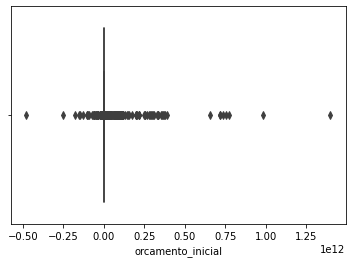

In [79]:
sns.boxplot(x=df['orcamento_inicial'])

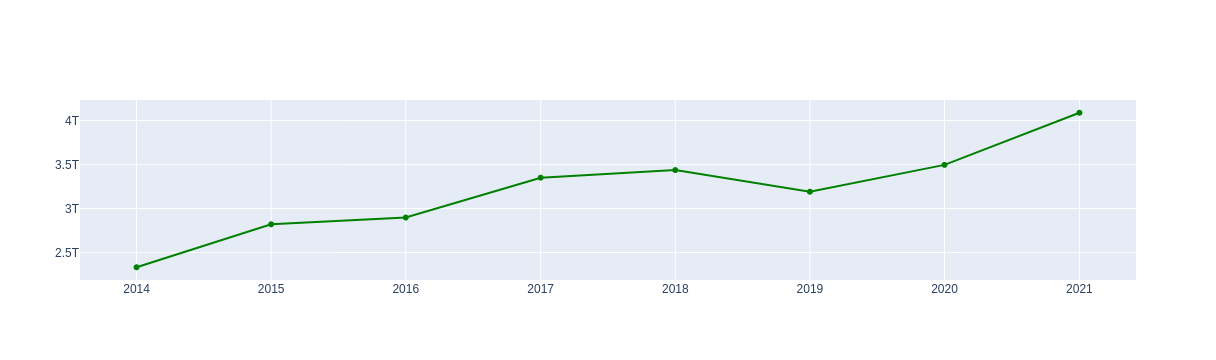

In [73]:
import plotly.graph_objects as go


fig = go.Figure([go.Scatter(x=acumulado_orcamento_anos.index
                            , y=acumulado_orcamento_anos.orcamento_inicial,marker = {'color' : 'green'})])
fig.show()

### 3.2.2 Orçamento atualizado

<AxesSubplot:xlabel='orcamento_atualizado'>

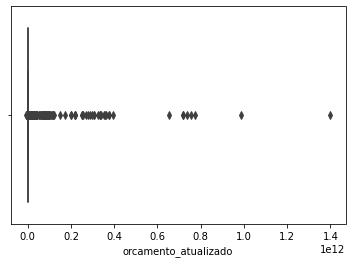

In [80]:
sns.boxplot(x=df['orcamento_atualizado'])

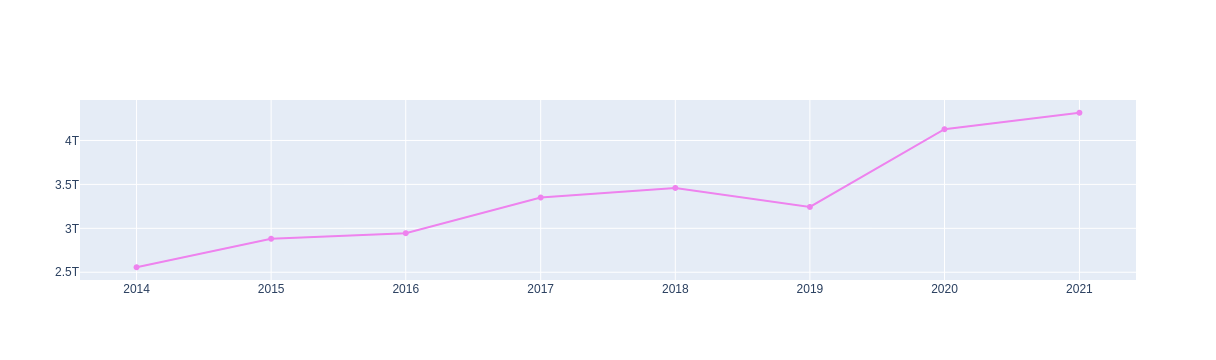

In [76]:
import plotly.graph_objects as go


fig = go.Figure([go.Scatter(x=acumulado_orcamento_anos.index
                            , y=acumulado_orcamento_anos.orcamento_atualizado,marker = {'color' : 'violet'})])
fig.show()

### 3.2.3 Orçamento empenhado

<AxesSubplot:xlabel='orcamento_empenhado'>

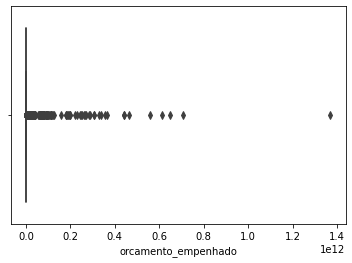

In [83]:
sns.boxplot(x=df['orcamento_empenhado'])

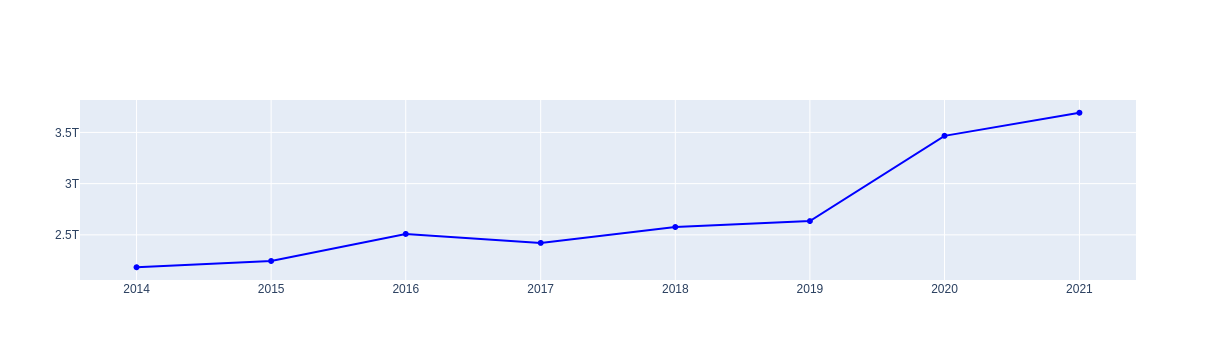

In [82]:
import plotly.graph_objects as go


fig = go.Figure([go.Scatter(x=acumulado_orcamento_anos.index
                            , y=acumulado_orcamento_anos.orcamento_empenhado,marker = {'color' : 'blue'})])
fig.show()

### 3.2.4 Orçamento realizado

<AxesSubplot:xlabel='orcamento_realizado'>

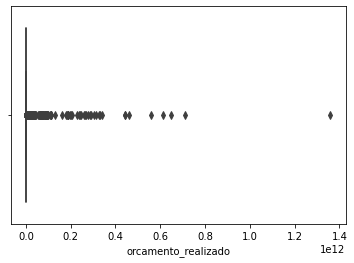

In [86]:
sns.boxplot(x=df['orcamento_realizado'])

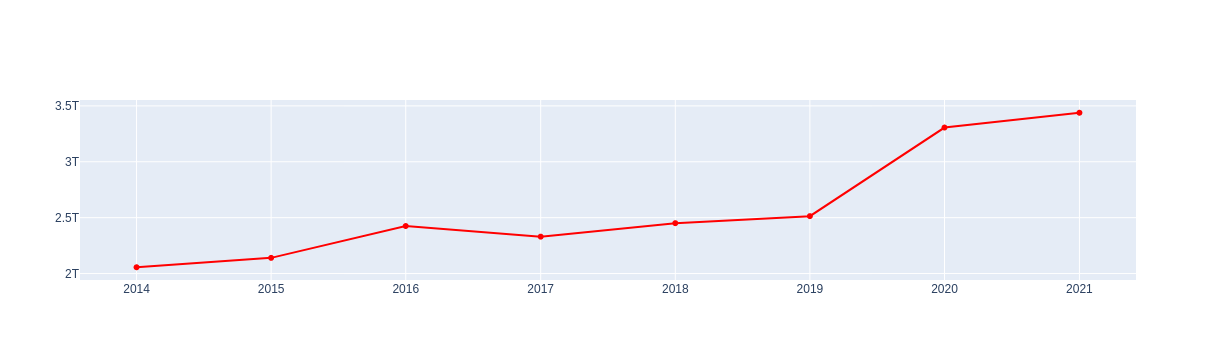

In [84]:
import plotly.graph_objects as go


fig = go.Figure([go.Scatter(x=acumulado_orcamento_anos.index
                            , y=acumulado_orcamento_anos.orcamento_realizado,marker = {'color' : 'red'})])
fig.show()

Como vemos, observamos outliers, no entanto não podemos trata-los, pois são dados emitidos pelo governo que descrevem gastos. Acreditamos que os outliers nesse caso devem ser mantidos e não estão incorretos

### código experimental, ignorar

In [24]:
numericas = ['orcamento_inicial','orcamento_atualizado','orcamento_empenhado','orcamento_realizado']

In [25]:
lista_ministerios = df.nome_orgao_sup.value_counts().index.tolist()

In [51]:
lista_anos = []
for val in df.exercicios.value_counts().index.tolist():
    lista_anos.append(val.year)

In [52]:
lista_anos

[2014, 2015, 2020, 2016, 2019, 2017, 2018, 2021]

In [53]:
lista_ministerios_df = pd.DataFrame(columns=lista_ministerios,index=lista_anos)

In [54]:
orcamento_inicial = df.copy()

In [55]:
orcamento_inicial = orcamento_inicial.groupby(["nome_orgao_sup","exercicios"]).sum()
orcamento_inicial = orcamento_inicial.fillna(0)

In [56]:
lista_ministerios_df

,Ministério da Educação,Ministério da Economia,Ministério da Defesa,Ministério da Saúde,Ministério do Desenvolvimento Regional,Ministério da Infraestrutura,"Ministério da Ciência, Tecnologia, Inovações e Comunicações",Ministério da Justiça e Segurança Pública,Ministério de Minas e Energia,"Ministério da Agricultura, Pecuária e Abastecimento",Ministério do Turismo,Ministério do Meio Ambiente,Presidência da República,Ministério da Cidadania,"Ministério do Planejamento, Desenvolvimento e Gestão",Ministério das Comunicações,Ministério das Relações Exteriores,Ministério do Esporte,Ministério das Cidades,"Ministério da Mulher, Família e Direitos Humanos",Ministério da Cultura,"Ministério da Indústria, Comércio Exterior e Serviços",Ministério do Desenvolvimento Agrário,Controladoria-Geral da União,Advocacia-Geral da União,Ministério do Trabalho,"Ministério das Mulheres, Igualdade Racial, da Juventude e dos Direitos Humanos",Ministério do Trabalho e Emprego,Ministério da Pesca e Aquicultura,Ministério da Previdência Social
2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [57]:
lista_ministerios_df['Ministério da Educação'][2014]

nan

In [58]:

for col in lista_ministerios_df.columns:
    for year in lista_anos:
        lista_ministerios_df[col][year] = orcamento_inicial.loc[col].orcamento_realizado[f'{year}-01-01']
        #print(orcamento_inicial.loc[col].orcamento_realizado[f'{year}-01-01'])
        

KeyError: '2020-01-01'

In [ ]:
orcamento_inicial

In [ ]:
orcamento_inicial

In [ ]:
teste = df.copy().reset_index()
teste = df.melt(id_vars=['nome_orgao_sup', 'exercicios'])

In [ ]:
teste